In [2]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer, BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8020\3115452656.py:5: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import execute, Aer, BasicAer


# 1. Menggabungkan Sirkuit
Dua atau lebih sirkuit dapat digabung menggunakan metode: "Compose" atau "Append" 

### A. Metode Compose

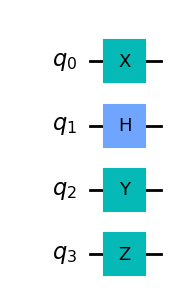

In [60]:
# Sirkuit A
qc_a = QuantumCircuit(4, name="Sirkuit A")
qc_a.x(0)
qc_a.h(1)
qc_a.y(2)
qc_a.z(3)
qc_a.draw("mpl")

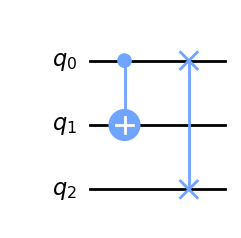

In [62]:
Sirkuit B
qc_b = QuantumCircuit(3, name="Sirkuit B")
qc_b.cx(0,1)
qc_b.swap(0,2) 
qc_b.draw("mpl") 

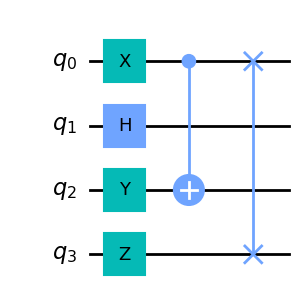

In [63]:
# Qubit pada sirkuit B ditempatkan pada posisi [0, 2, 3] pada sirkuit A 
combined = qc_a.compose(qc_b, qubits=[0,2,3])
combined.draw("mpl")

### B. Metode append 

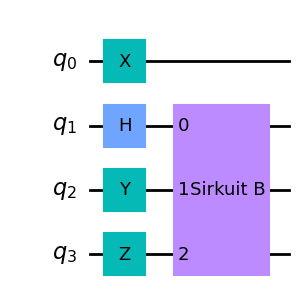

In [65]:
inst = qc_b.to_instruction()  # Untuk mengkompilasi sirkuit agar tetap teratur.
qc_a.append(inst, [1, 2, 3])
qc_a.draw("mpl")

- Jika rangkaian Anda unitary, Anda dapat mengubahnya menjadi Gerbang dengan menggunakan metode to_gate. 
Objek gerbang adalah tipe instruksi spesifik yang memiliki beberapa fitur tambahan, seperti metode kontrol, 
yang menambahkan kontrol kuantum.

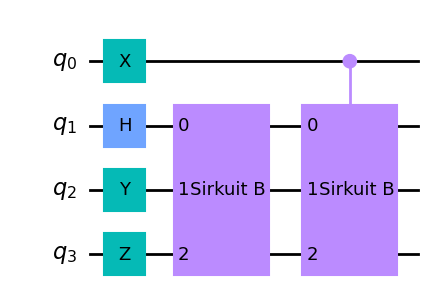

In [66]:
gerbang = qc_b.to_gate().control()
qc_a.append(gerbang, [0, 1, 2, 3])
qc_a.draw("mpl")

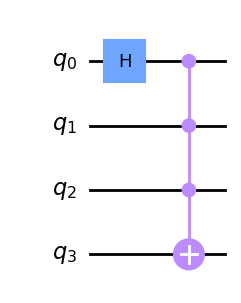

In [16]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0,1,2,3])
qc.draw('mpl')

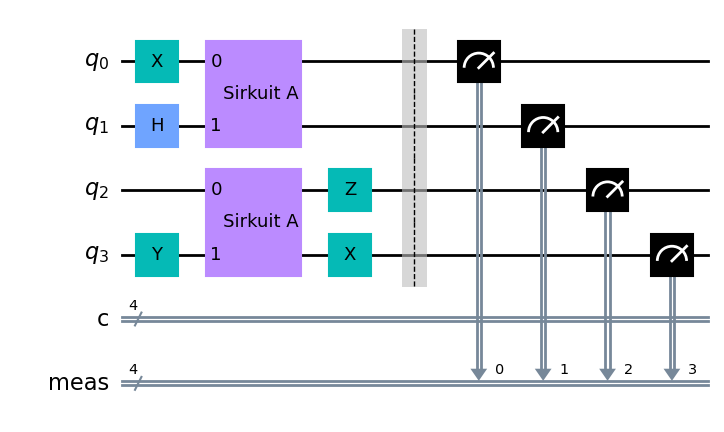

In [24]:
from qiskit import QuantumCircuit
qc_A = QuantumCircuit(2, name="Sirkuit A")
qc_A.h(0)
qc_A.cx(0, 1)
qc_A = qc_A.to_gate()
   
qc = QuantumCircuit(4, 4, name="sirkuit B")
qc.x(0)
qc.h(1)
qc.y(3)

qc.append(qc_A, [0, 1], [])
qc.append(qc_A, [2, 3], [])
qc.z(2)
qc.x(3)

qc.measure_all()
qc.draw('mpl')


### C. Metode Decompose
- Untuk melihat isi rangkaian dalam kotak, dan memperluas setiap instruksi ke dalam definisinya.

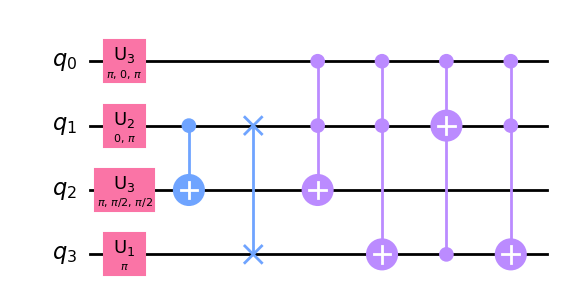

In [67]:
qc_a.decompose().draw("mpl")

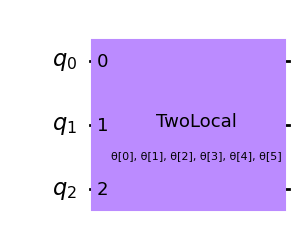

In [72]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=1, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.draw('mpl')

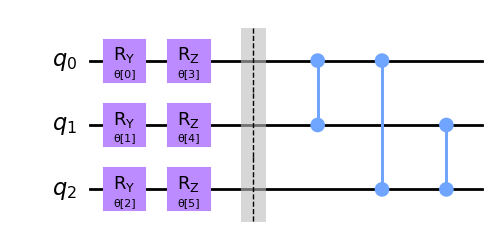

In [73]:
qc_twolocal.decompose().draw('mpl')

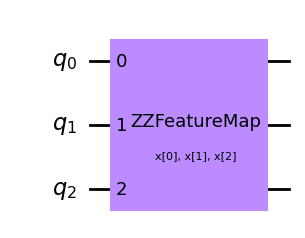

In [74]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.draw('mpl')

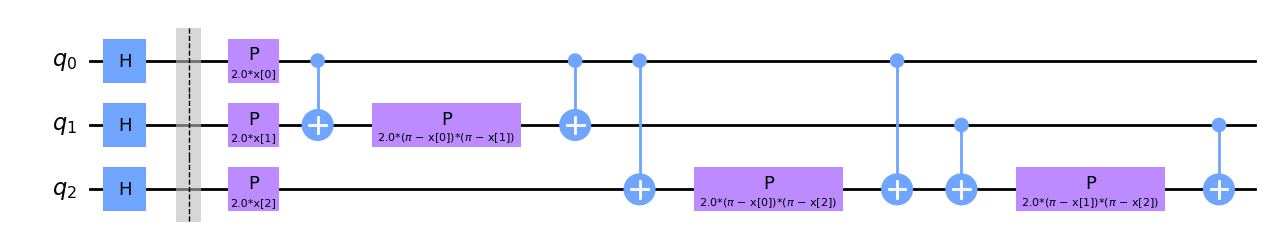

In [76]:
qc_zz.decompose().draw('mpl')